# The Billboard Hot 100

Started by Billboard Magazine the Billboard Hot 100 is the industry standard record chart in the United States. It is published on a weekly basis (the cut-off date being Saturday). 

Chart rankings are based on sales (physical and digital), radio play, and online streaming in the United States.

The weekly tracking period for sales was initially Monday to Sunday when Nielsen started tracking sales in 1991, but was changed to Friday to Thursday in July 2015. This tracking period also applies to compiling online streaming data. Radio airplay, which, unlike sales figures and streaming, is readily available on a real-time basis, is tracked on a Monday to Sunday cycle (previously Wednesday to Tuesday). A new chart is compiled and officially released to the public by Billboard on Tuesdays.

The Billboard Hot 100 goes way back to 1958 and has had hundreds of songs listed and yet, I'm fascinated that only a small amount of all music makes its way onto this chart. In this notebook I'll explore the songs that make it onto the Hot 100 and in the process answer a few questions, I've always had about this famous weekly list.

In [359]:
import numpy as np
import pandas as pd

hot100 = pd.read_csv('../data/processed/hot100.csv',parse_dates=['date','entry_date','exit_date','peak_date','max_leap_date'],sep='\t')
hot100_uniq = hot100.drop_duplicates(subset=['artist','title']).drop('rank',axis=1)
hot100_uniq.set_index(['artist','title'],drop=True,inplace=True)
hits = pd.read_csv('../data/processed/hits_uniq.csv',sep='\t')
nhits = pd.read_csv('../data/processed/nhits_uniq.csv',sep='\t')

hot100.head(5)

,rank,date,year,month,day,title,artist,reentry,streak,ranked,entry_date,entry,entry_year,entry_month,entry_day,exit_date,exit,exit_year,exit_month,exit_day,peak,peak_date,peak_year,peak_month,peak_day,leap,max_leap,max_leap_date,max_leap_year,max_leap_month,max_leap_day,low
0,1,1967-07-08,1967,7,8,Windy,The Association,NaN,13,14,1967-05-27,52,1967,5,27,1967-08-26,34,1967,8,26,1,1967-05-27,1967,5,27,0.0,24.0,1967-06-03,1967,6,3,52
1,2,1967-07-08,1967,7,8,Little Bit O' Soul,The Music Explosion,NaN,15,16,1967-05-13,90,1967,5,13,1967-08-26,46,1967,8,26,2,1967-05-13,1967,5,13,1.0,33.0,1967-05-27,1967,5,27,90
2,3,1967-07-08,1967,7,8,Can't Take My Eyes Off You,Frankie Valli,NaN,15,16,1967-05-20,74,1967,5,20,1967-09-02,35,1967,9,2,2,1967-05-20,1967,5,20,4.0,21.0,1967-05-27,1967,5,27,74
3,4,1967-07-08,1967,7,8,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,NaN,11,12,1967-05-27,98,1967,5,27,1967-08-12,28,1967,8,12,4,1967-05-27,1967,5,27,0.0,43.0,1967-06-03,1967,6,3,98
4,5,1967-07-08,1967,7,8,Don't Sleep In The Subway,Petula Clark,NaN,9,10,1967-06-03,76,1967,6,3,1967-08-05,42,1967,8,5,5,1967-06-03,1967,6,3,5.0,27.0,1967-06-10,1967,6,10,76


In [176]:
hot100.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,316685.0,50.501094,28.866120,1.0,26.0,51.0,76.0,100.0
year,316685.0,1988.441669,17.526335,1958.0,1973.0,1988.0,2004.0,2019.0
month,316685.0,6.526754,3.454862,1.0,4.0,7.0,10.0,12.0
day,316685.0,15.717426,8.798738,1.0,8.0,16.0,23.0,31.0
reentry,28786.0,1.378205,0.934757,1.0,1.0,1.0,2.0,14.0
streak,316685.0,15.683979,9.305860,0.0,9.0,15.0,19.0,84.0
ranked,316685.0,17.091207,9.619444,1.0,10.0,16.0,20.0,87.0
entry,316685.0,78.154832,19.982164,1.0,71.0,84.0,92.0,100.0
entry_year,316685.0,1988.236080,17.481917,1958.0,1973.0,1988.0,2003.0,2019.0
entry_month,316685.0,6.622306,3.408660,1.0,4.0,7.0,10.0,12.0


# Data

The **Hot 100 charts, hits sample, audio-features and non-hits sample** have been obtained from **Billboard.com (Hot 100)** and the **Spotify API (Audio Features and Non Hits Sample)**

The **hits** sample is a subset of the **Hot 100** charts, enriched using the [Spotify Audio Features Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). Unfortunately, not all songs could be matched with a Spotify ID and retrieved. Hence, **hits** has dropped all songs that came back empty.

The **non-hits** sample is sampled using the [Spotify API Search](https://developer.spotify.com/documentation/web-api/reference/search/search/), randomly sampling a songs by year, so as to find songs that did not become hits. As that method overemphasizes popular songs, I've sampled 20% of each year from the lowest popularity (i.e. Spotify's popularity score).

For more information check out the Wrangling notebook *Wrangling (Hot 100 and Spotify Sample)*.

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

GrayO = ["orange","gray","black"]
sns.set_palette(GrayO)

%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.options.display.max_columns = 400

# The History

We'll start by looking into the general distribution of songs in the Hot 100.

- How many songs made it onto the Hot 100 since 1958?
- How long did songs stay on the Hot 100?
- What positions have the most fluctuation?

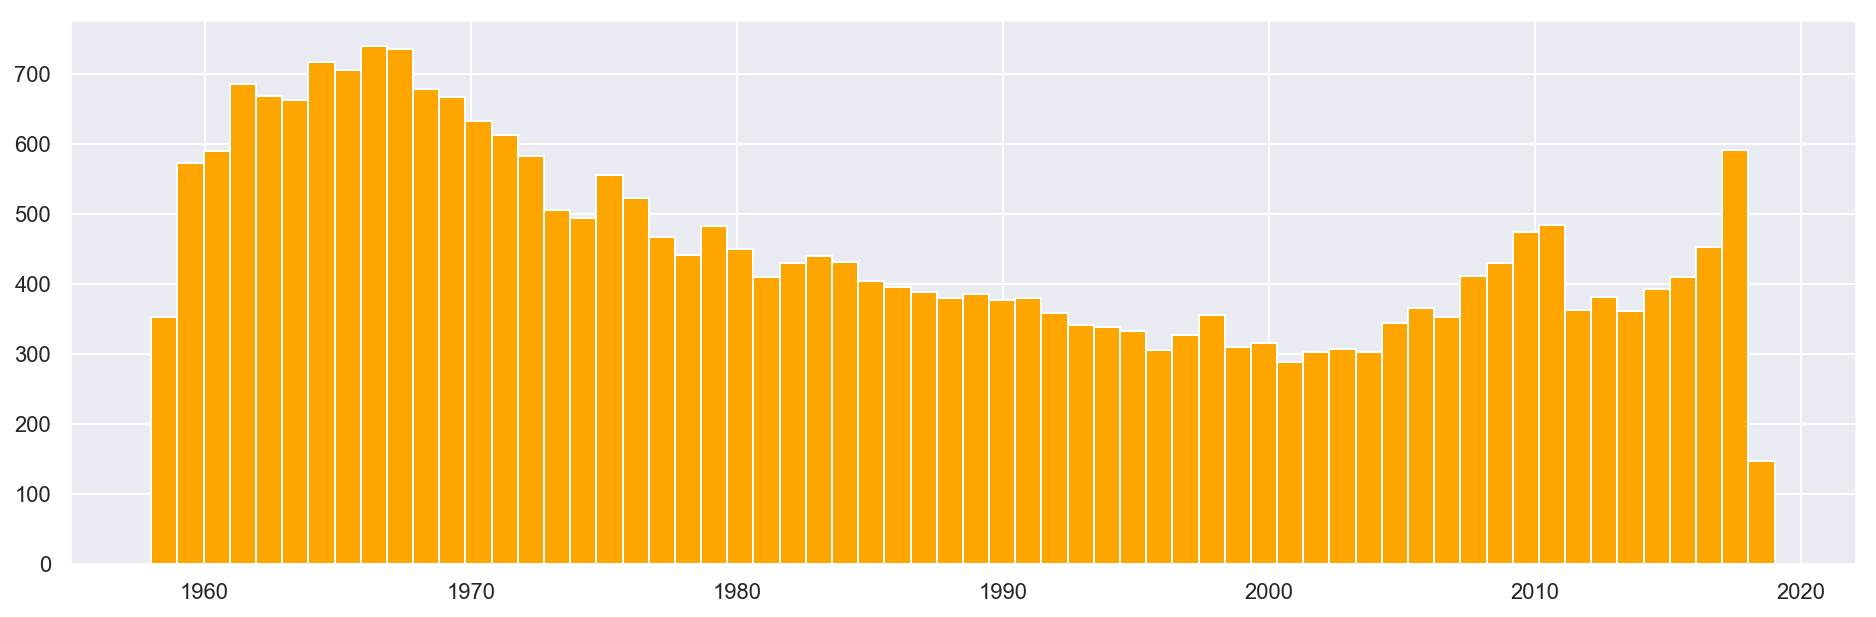

In [178]:
_ = plt.figure(figsize=(16,5))

years = len(hot100_uniq['entry_year'].unique())
_ = plt.hist(hot100_uniq['entry_year'],bins=years)

In [179]:
# Number of Unique Songs on the Hot 100 since 1958
print("Since 1958 there were *{}* songs on the Billboard Hot 100.".format(len(hot100_uniq)))

Since 1958 there were *28083* songs on the Billboard Hot 100.


Outliers in Streaks across the entire data set (according to 1.5 IQR rule): >31


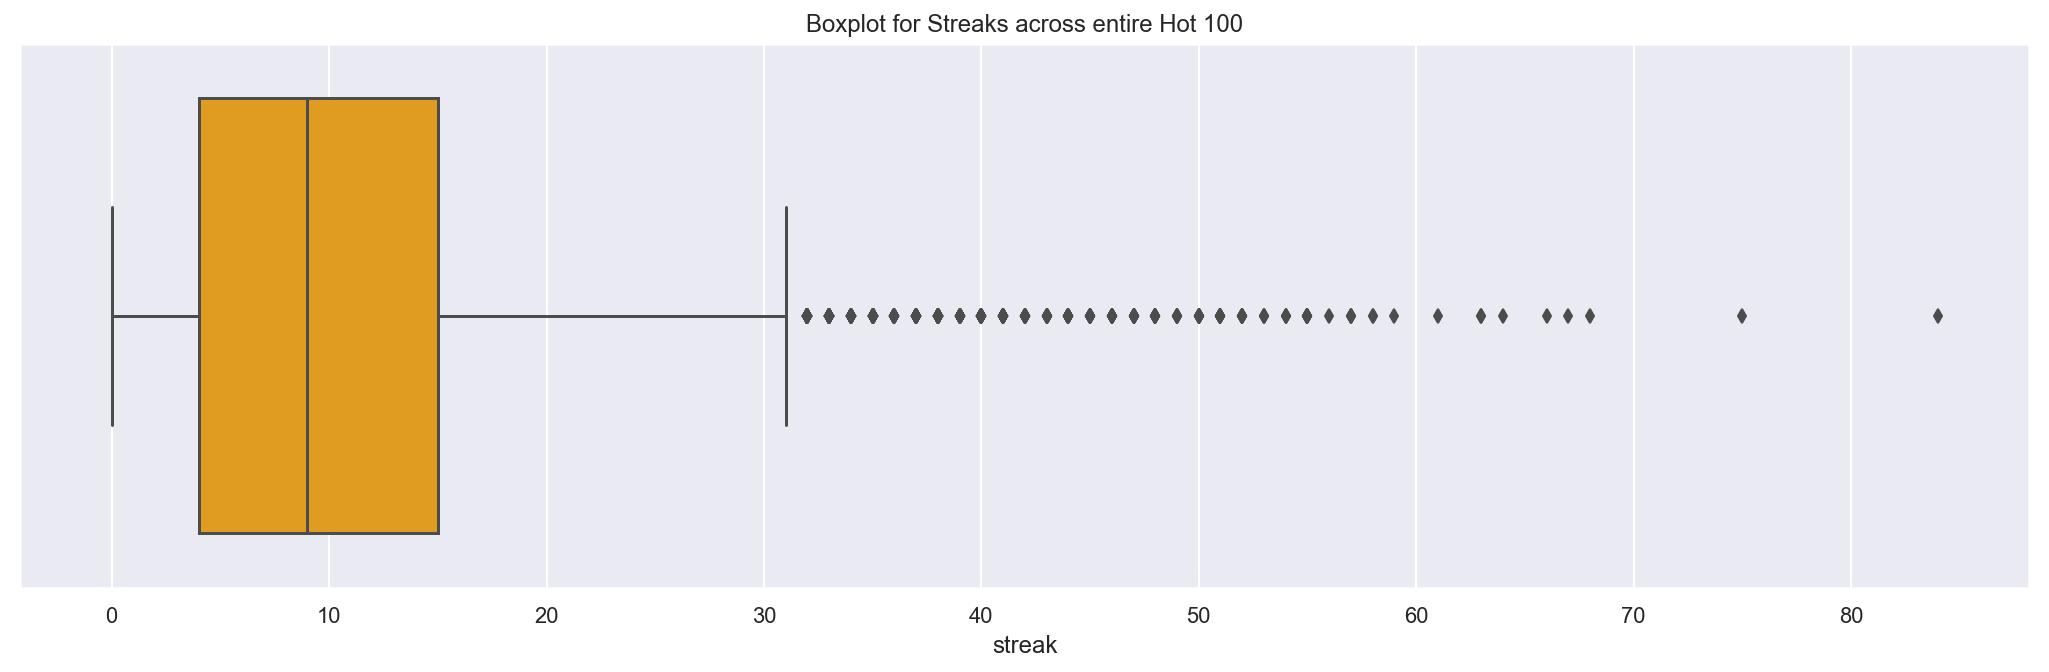

In [180]:
fig = plt.figure(figsize=(18,5))
_ = sns.boxplot(hot100_uniq['streak'])
_ = plt.xticks([0,10,20,30,40,50,60,70,80])
_ = plt.title('Boxplot for Streaks across entire Hot 100')

def get_outlier_boundary(series):
    first_q = series.quantile(q=0.25)
    third_q = series.quantile(q=0.75)
    iqr = (third_q - first_q)
    return int(third_q + iqr * 1.5)

upper_whisker = get_outlier_boundary(hot100_uniq['streak'])
print('Outliers in Streaks across the entire data set (according to 1.5 IQR rule): >{}'.format(upper_whisker))

In [181]:
# Examples of outliers
hot100_uniq.loc[hot100_uniq['streak'] > upper_whisker, :].sort_values(by='streak',ascending=False).head()

,,date,year,month,day,reentry,streak,ranked,entry_date,entry,entry_year,entry_month,entry_day,exit_date,exit,exit_year,exit_month,exit_day,peak,peak_date,peak_year,peak_month,peak_day,max_leap,max_leap_date,max_leap_year,max_leap_month,max_leap_day,low
artist,title,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagine Dragons,Radioactive,2014-03-22,2014,3,22,1.0,84,87,2012-08-18,93,2012,8,18,2014-05-10,49,2014,5,10,3,2012-08-18,2012,8,18,20.0,2014-02-15,2014,2,15,98
Jason Mraz,I'm Yours,2009-05-30,2009,5,30,NaN,75,76,2008-05-03,93,2008,5,3,2009-10-10,48,2009,10,10,6,2008-05-03,2008,5,3,15.0,2008-05-10,2008,5,10,93
LeAnn Rimes,How Do I Live,1997-06-28,1997,6,28,NaN,68,69,1997-06-21,89,1997,6,21,1998-10-10,45,1998,10,10,2,1997-06-21,1997,6,21,40.0,1997-06-28,1997,6,28,89
OneRepublic,Counting Stars,2014-03-22,2014,3,22,NaN,67,68,2013-07-06,32,2013,7,6,2014-10-18,50,2014,10,18,2,2013-07-06,2013,7,6,14.0,2013-09-21,2013,9,21,80
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,2011-04-16,2011,4,16,1.0,66,68,2011-02-12,78,2011,2,12,2012-07-21,49,2012,7,21,1,2011-02-12,2011,2,12,22.0,2011-04-23,2011,4,23,88


The boxplot across the entire dataset gives us some information on median, quantiles and outliers that will inform our analysis in the more detailed few below. 

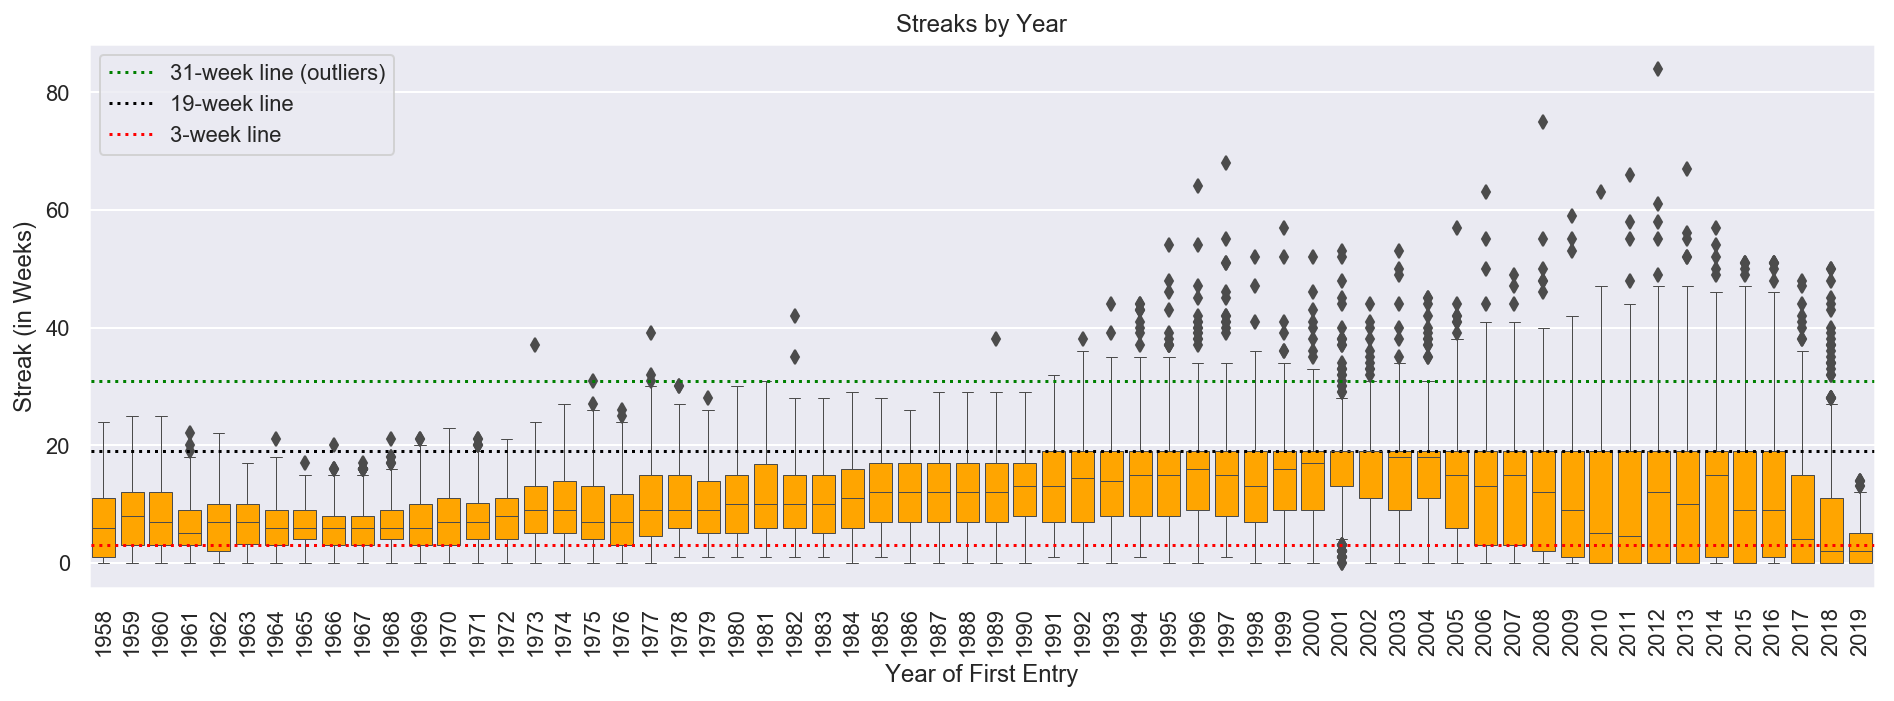

In [182]:
_ = plt.figure(figsize=(16,5))

_ = sns.boxplot(x='entry_year',y='streak',data=hot100_uniq,color='orange',saturation=1,linewidth=0.5)
_ = plt.plot([-1,62],[upper_whisker,upper_whisker],c='green',linestyle='dotted',label='31-week line (outliers)')
_ = plt.plot([-1,62],[19,19],c='black',linestyle='dotted',label='19-week line')
_ = plt.plot([-1,62],[3,3],c='red',linestyle='dotted',label='3-week line')
_ = plt.xticks(rotation=90)
_ = plt.title('Streaks by Year')
_ = plt.xlabel('Year of First Entry')
_ = plt.ylabel('Streak (in Weeks)')
_ = plt.legend()

plt.show()


In [183]:
outlier_bf_1991 = hot100_uniq.loc[(hot100_uniq['year'] < 1991) & (hot100_uniq['streak'] > upper_whisker),['streak','peak','entry','exit']]
outlier_af_1991 = hot100_uniq.loc[(hot100_uniq['year'] >= 1991) & (hot100_uniq['streak'] > upper_whisker),['streak','peak','entry','exit']]

print("Number of Titles that stayed on the Hot 100 for more than 30 weeks \nBefore 1991 (33 years) - {}\nAfter 1991 (29 years) - {}".format(len(over_30_bf_1990),len(over_30_af_1990)))

Number of Titles that stayed on the Hot 100 for more than 30 weeks 
Before 1991 (33 years) - 6
After 1991 (29 years) - 430


In the above chart we can see the streak length by year. Until the early 1970s no song title would be on the Hot 100 for more than 25 weeks and until the early 1990s staying charted for over 31 weeks (i.e. outliers across the entire data as shown above) was the rare exception. In fact, there are only 6 artists who've achieved this feat (they are listed below).

In [184]:
outlier_bf_1991.sort_values(by='streak',ascending=False).head(10)

,,streak,peak,entry,exit
artist,title,,,,
Soft Cell,Tainted Love,42,8,90,97
Paul Davis,I Go Crazy,39,7,89,99
Young M.C.,Bust A Move,38,7,81,90
Kris Kristofferson,Why Me,37,16,100,52
Laura Branigan,Gloria,35,2,84,98
Bee Gees,How Deep Is Your Love,32,1,83,59


Go to Playlist: https://open.spotify.com/user/1162788143/playlist/0iP1Sz5qSCmVomZUNYbKPj?si=8SyDMByGRK60HNPHv9-HZA

In [185]:
outlier_af_1991.sort_values(by='streak',ascending=False).head(10)

,,streak,peak,entry,exit
artist,title,,,,
Imagine Dragons,Radioactive,84,3,93,49
Jason Mraz,I'm Yours,75,6,93,48
LeAnn Rimes,How Do I Live,68,2,89,45
OneRepublic,Counting Stars,67,2,32,50
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,66,1,78,49
Jewel,Foolish Games/You Were Meant For Me,64,2,61,47
Adele,Rolling In The Deep,63,1,68,49
Carrie Underwood,Before He Cheats,63,8,92,47
The Lumineers,Ho Hey,61,3,90,50


Go to Playlist: https://open.spotify.com/user/1162788143/playlist/4hzjzSssha8VLHqwbyJiWA?si=xWT5wbXAR7OOeuyCrQKO-w

_NOTE: Unfortunately, there is 52 of the 430 songs missing from the playlist that couldn't be found on Spotify or are missing due to country restrictions._

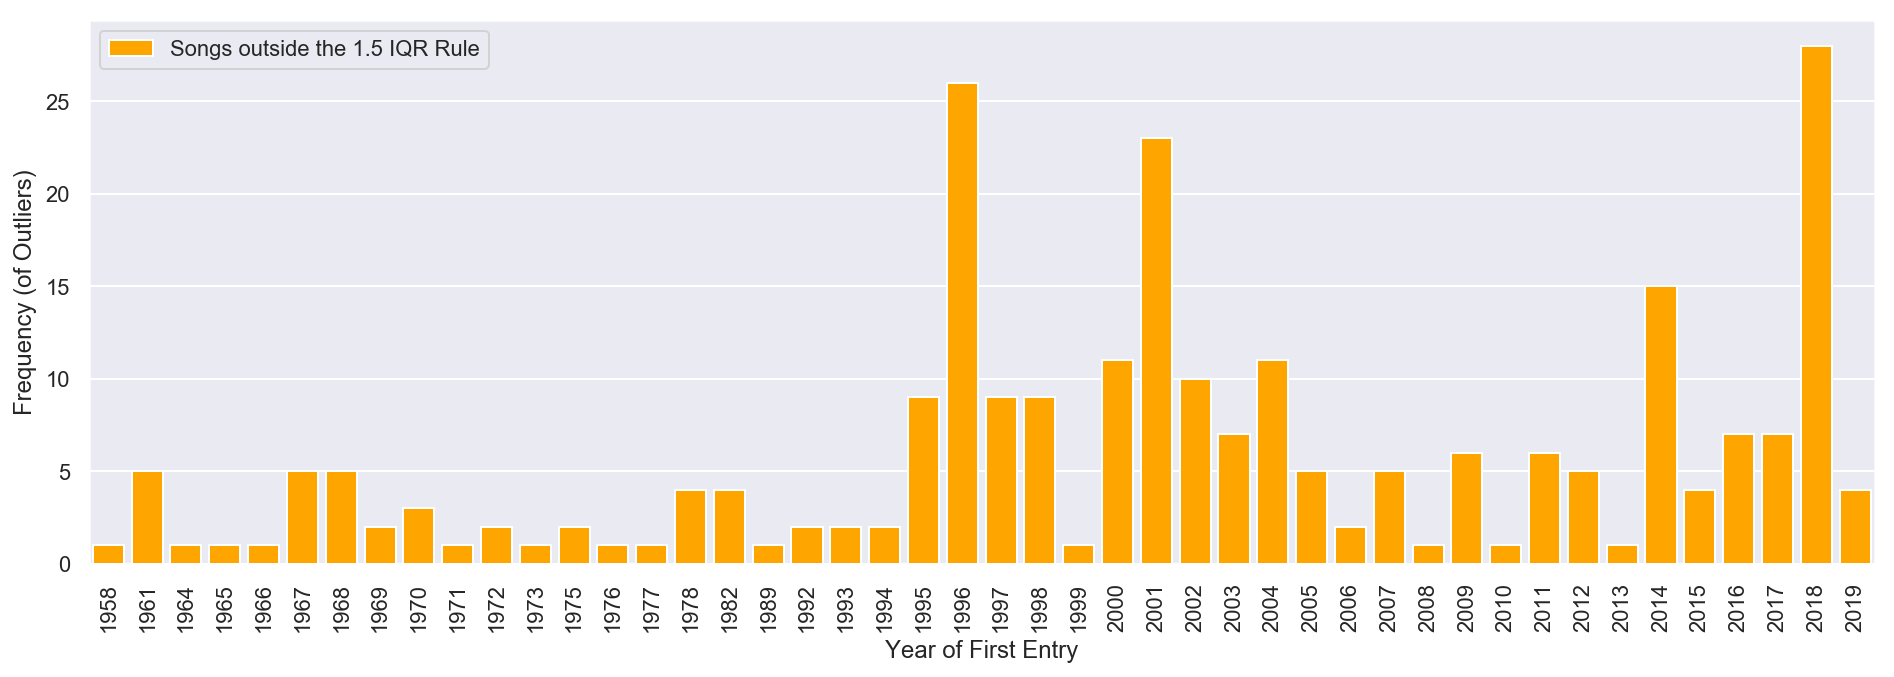

Standard Deviations:
<1991: 5.703656742368894
>=1991: 10.154355499124337


In [186]:
_ = plt.figure(figsize=(16,5))

# Define outlier_boundary by year and retrieve outliers
outlier_boundary = hot100_uniq.groupby(by='year').streak.apply(get_outlier_boundary)
outlier_boundary.name = 'outlier_boundary'
hot100_streak = hot100_uniq.merge(outlier_boundary,on=['year'],how='left')
outliers = hot100_streak.loc[hot100_streak['streak'] > hot100_streak['outlier_boundary'], :]

# Plot data
sns.countplot(outliers.year,color='orange',saturation=1)
plt.xlabel('Year of First Entry')
plt.xticks(rotation=90)
plt.ylabel('Frequency (of Outliers)')
plt.legend(['Songs outside the 1.5 IQR Rule'])
plt.show()

# Print Standard Deviation along the 1991 boundary
std_bf_1991 = hot100_uniq.loc[hot100_uniq['year'] < 1991,'streak'].std()
std_af_1991 = hot100_uniq.loc[hot100_uniq['year'] >= 1991,'streak'].std()
print("Standard Deviations:\n<1991: {}\n>=1991: {}".format(std_bf_1991,std_af_1991))

### Super Songs emerge in 1993

With 1993 we can also see a pattern of 'Super Songs' emerge. Before 1995, there were only few songs that stayed long enough to be considered an outlier (IQR * 1.5 rule). After 1993, however we can suddenly see these breakout songs occuring much more often. Standout years are 1996, 2001 and 2018 but other years are generating more outliers as well. This is despite (or due to?) a generally larger standard deviation in streaks on the Hot 100 after 1991. We can also see in the first streak plot that the outliers tend to stray further than outliers before 1991 (i.e. they stay longer on the hot 100 or are 'stickier').

### 19-week Pattern of lower 75% (third quartile)

Between 1991 and 2016 the third quartile (i.e. upper quartile) is consistently at 19 weeks. There's no deviation from this pattern, no single year has a third quartile that surpasses the 19 weeks cap, which makes me wonder whether there is an unknown underlying rule and whether that is an rule explicitly set by Billboard or has some mathematical logic to it that sets this limitation to 19 weeks for the lower 75% due to the restriction to 100 spots and 52 weeks in total.

### Higher Fluctuation in Recent Years

Starting in 2006 we can see that the first quartile (i.e. lower quartile) is stretching into the <3 weeks region. A pattern we hadn't seen since the mid-1970s. This would indicate a higher fluctuation and is probably a result of Billboard starting slowly incorporating more and more online sales and streaming revenue into their formula since 2005 (https://en.m.wikipedia.org/wiki/Billboard_Hot_100 see _Digital downloads and online streaming_). 

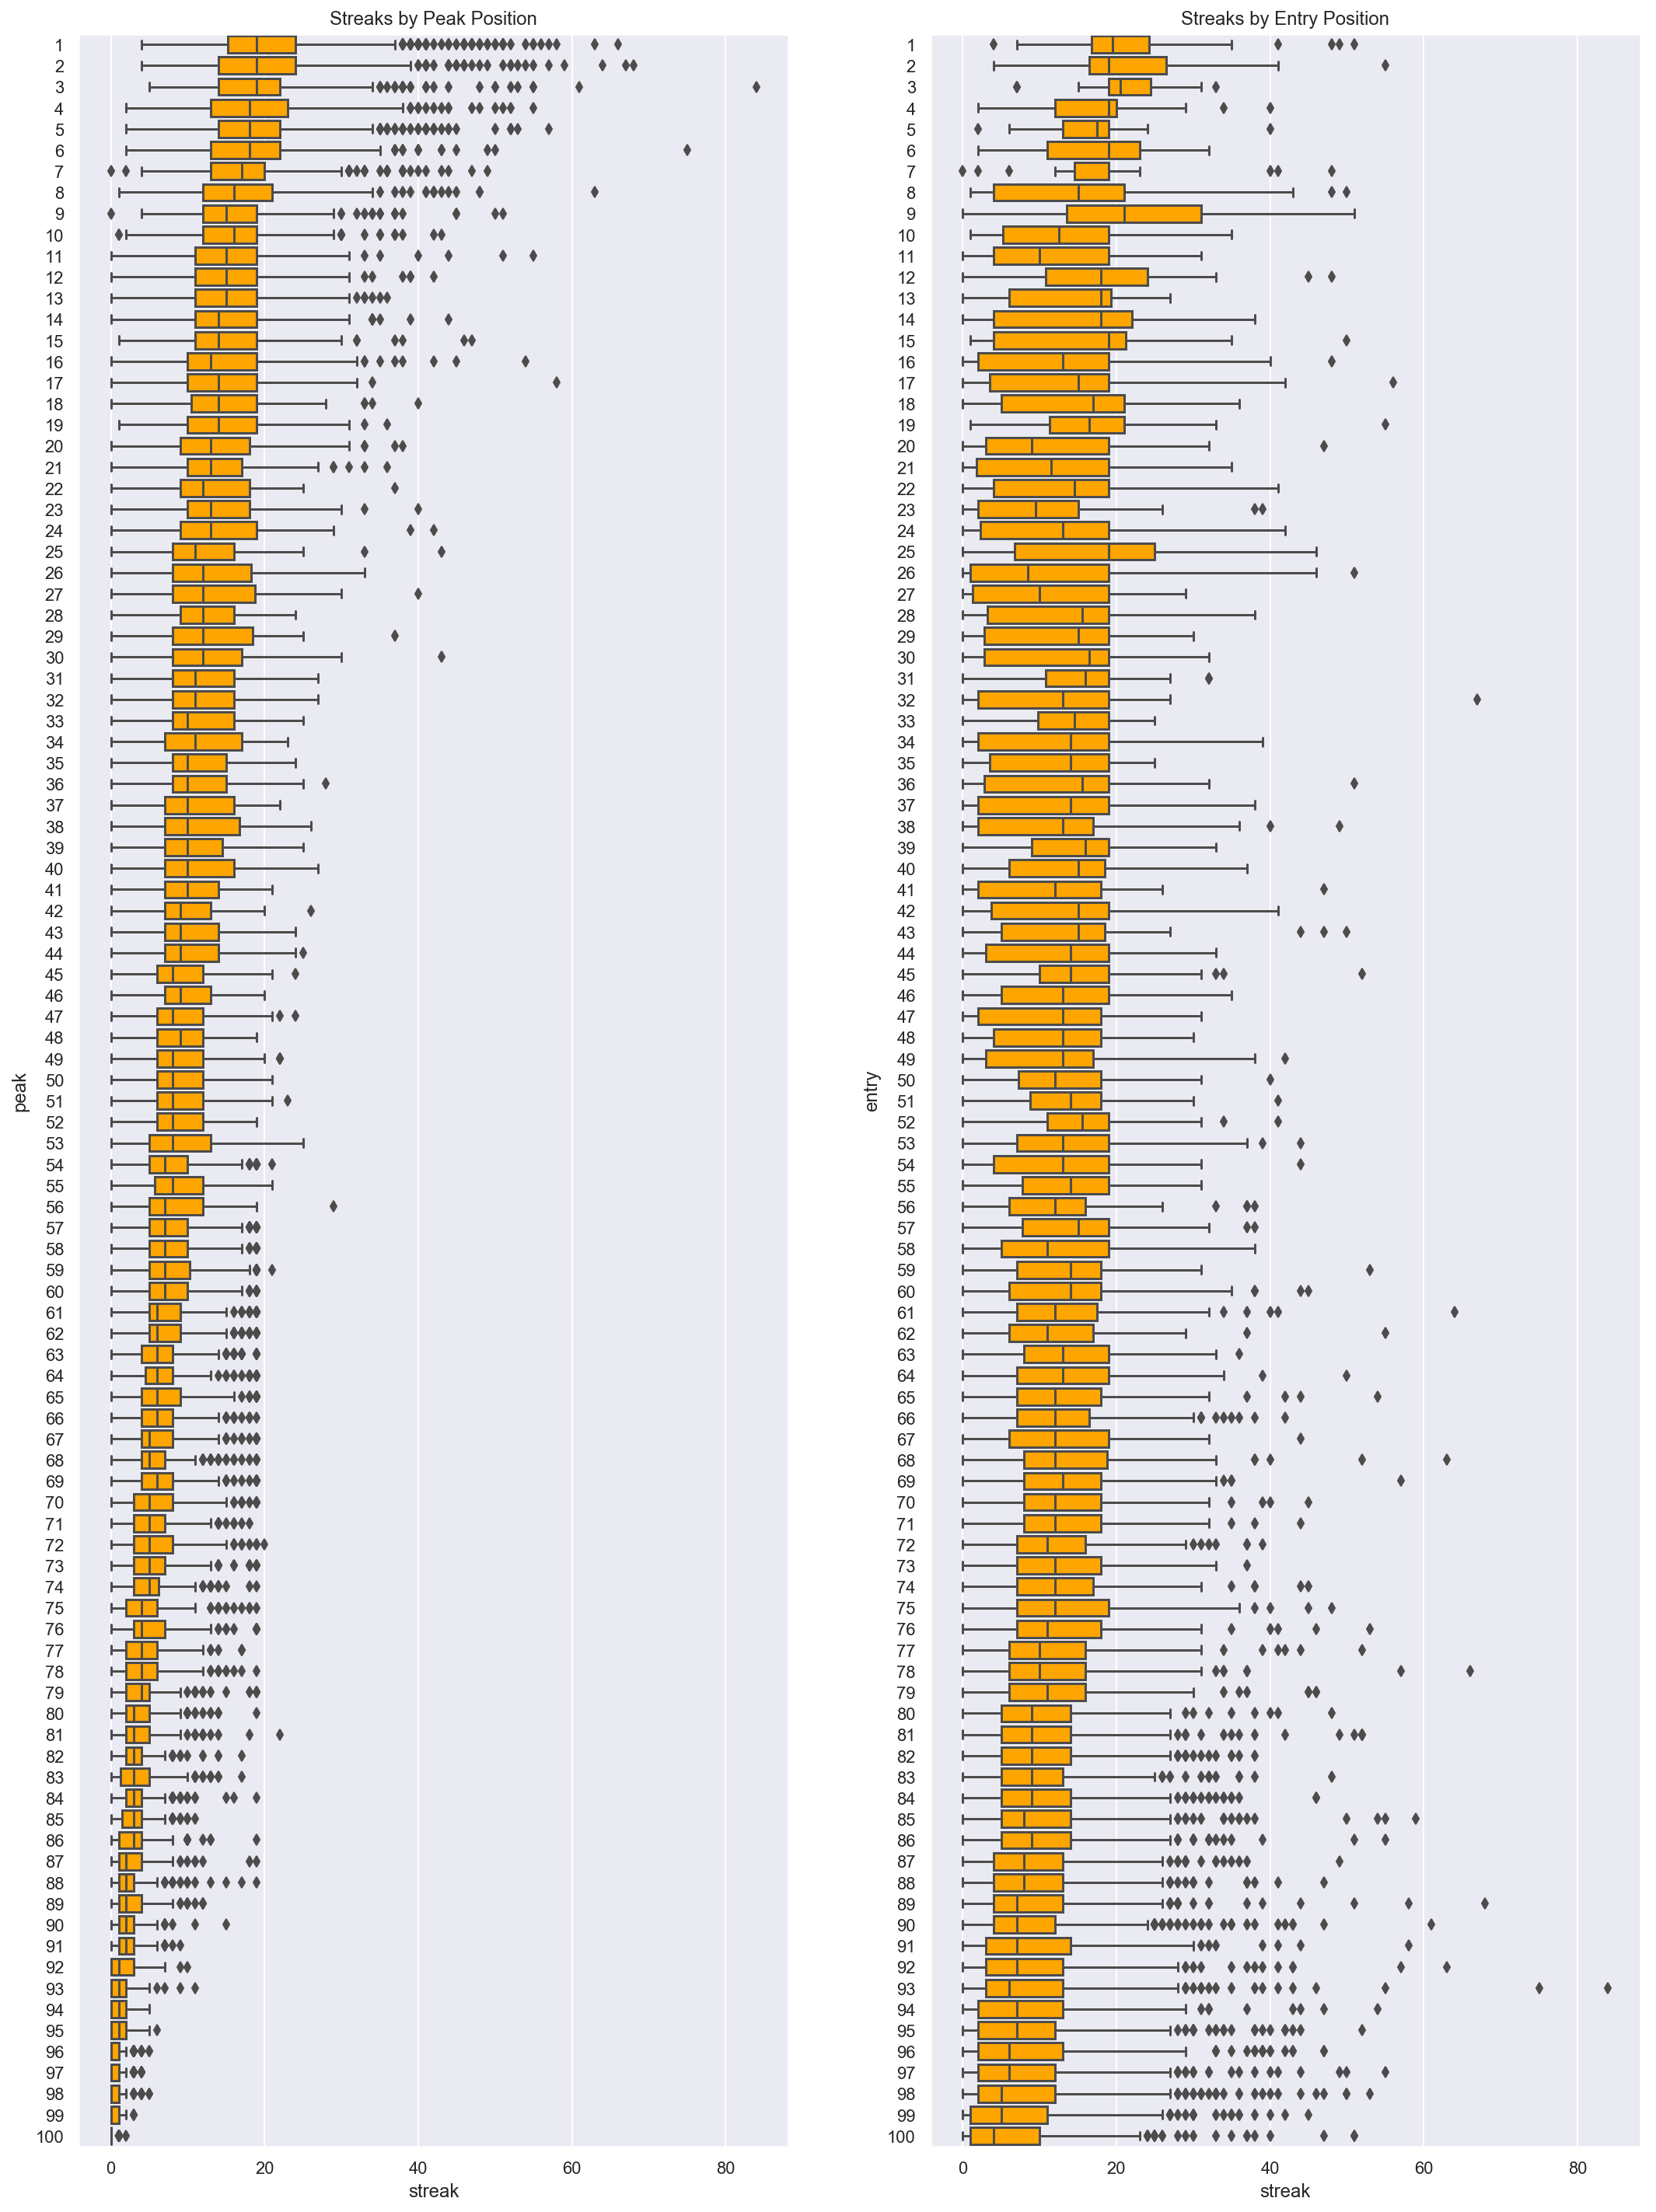

In [385]:
fig, ax = plt.subplots(1,2,figsize=(18,25))

_ = plt.subplot(1,2,1)
_ = sns.boxplot(y='peak',x='streak',data=hot100_uniq,saturation=1,color='orange',orient='h')
_ = plt.title('Streaks by Peak Position')

_ = plt.subplot(1,2,2)
_ = sns.boxplot(y='entry',x='streak',data=hot100_uniq,saturation=1,color='orange',orient='h')
_ = plt.title('Streaks by Entry Position')

### A First Hypothesis for Weighing

In conclusion, the different streak lengths bring me to a first hypothesis. 

"Not all titles that make it onto the Hot 100 are created equal."

There are different categories (e.g. long-lasting, medium-range, short-stays), with different chances of making it onto the Hot 100. This could allow us to create subcategories with higher probabilities of making it onto the Hot 100 and those that are just flukes/noise. 

# Who jumped the furthest? Leaps

Now that we've looked at streaks, I'm interested to know how the leaps from one position to another are distributed.

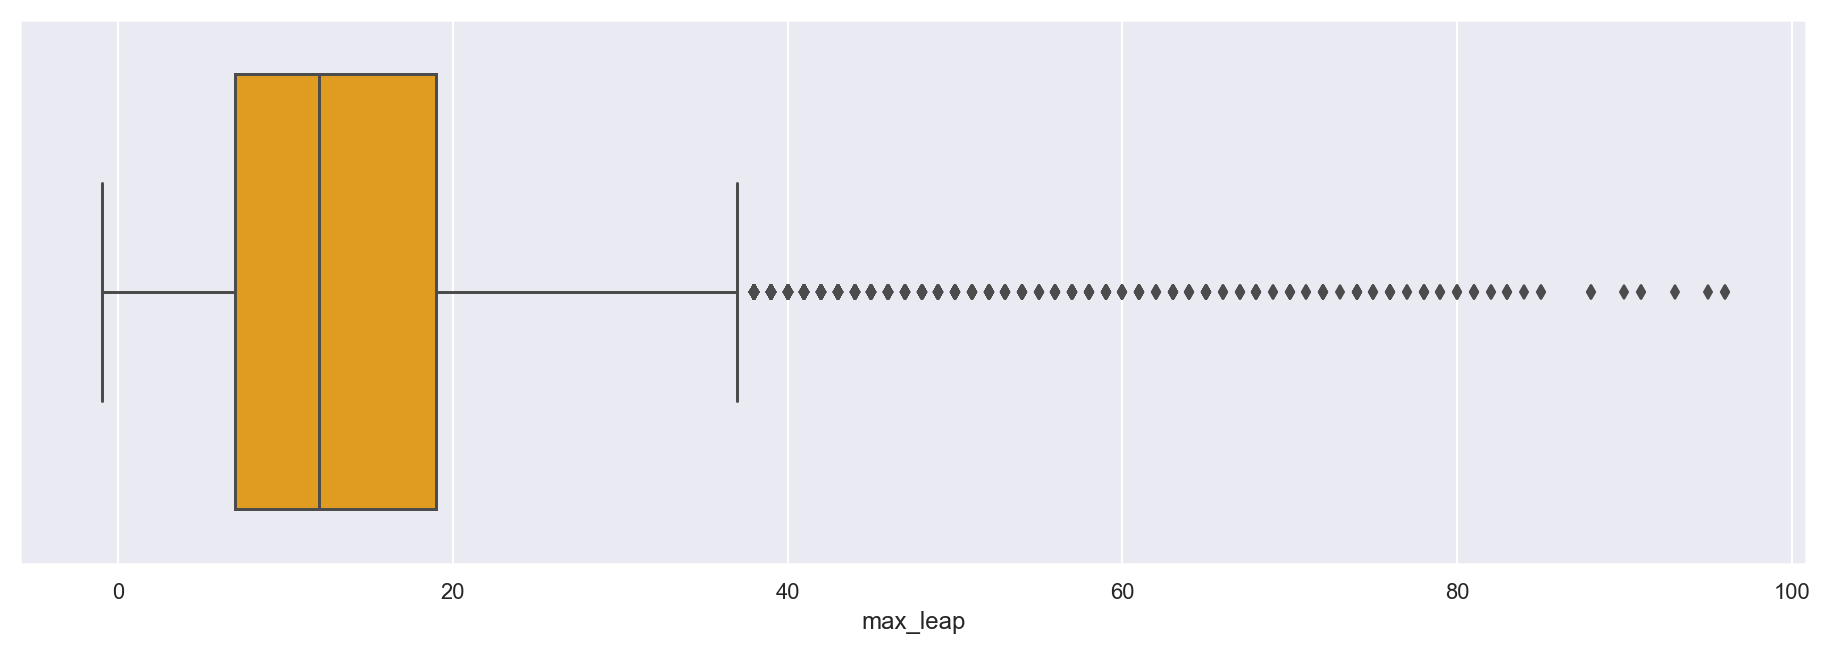

In [210]:
_ = plt.figure(figsize=(16,5))
_ = sns.boxplot(hot100_uniq['max_leap'])

We see that the median leap was just above 10 positions and that we can generally expect a title to jump at best between 7 and 19 places. We also can see that leaps beyond the 40 are generally rare. 

This makes me wonder whether there is a lower mobility for tracks to move from lower positions to top positions or whether these moves just tend to be slow-moving.

In [364]:
rank = hot100.loc[:,['artist','title','rank','entry','date']]
rank['title_artist'] = rank['title'] + '------' + rank['artist']
rank.drop(['title','artist'],axis=1,inplace=True)

def get_week(col):
    return pd.Series(np.arange(1,len(col) + 1))

rank_sorted = rank.sort_values(by=['title_artist','date'])
rank_sorted['week'] = rank_sorted.groupby(by=['title_artist']).date.transform(get_week)
rank_sorted = rank_sorted.set_index(['week','entry'])
rank_sorted['rank_mean'] = rank_sorted.groupby(by=['week','entry'])['rank'].mean()
rank_sorted.drop(['title_artist','date','rank'],axis=1,inplace=True)
rank_sorted.columns = ['value']
rank_sorted.reset_index(inplace=True)

In [365]:
rank_sorted.head()

,week,entry,value
0,1,84,84.000000
1,2,84,72.417105
2,3,84,62.917344
3,4,84,55.562147
4,5,84,49.724444


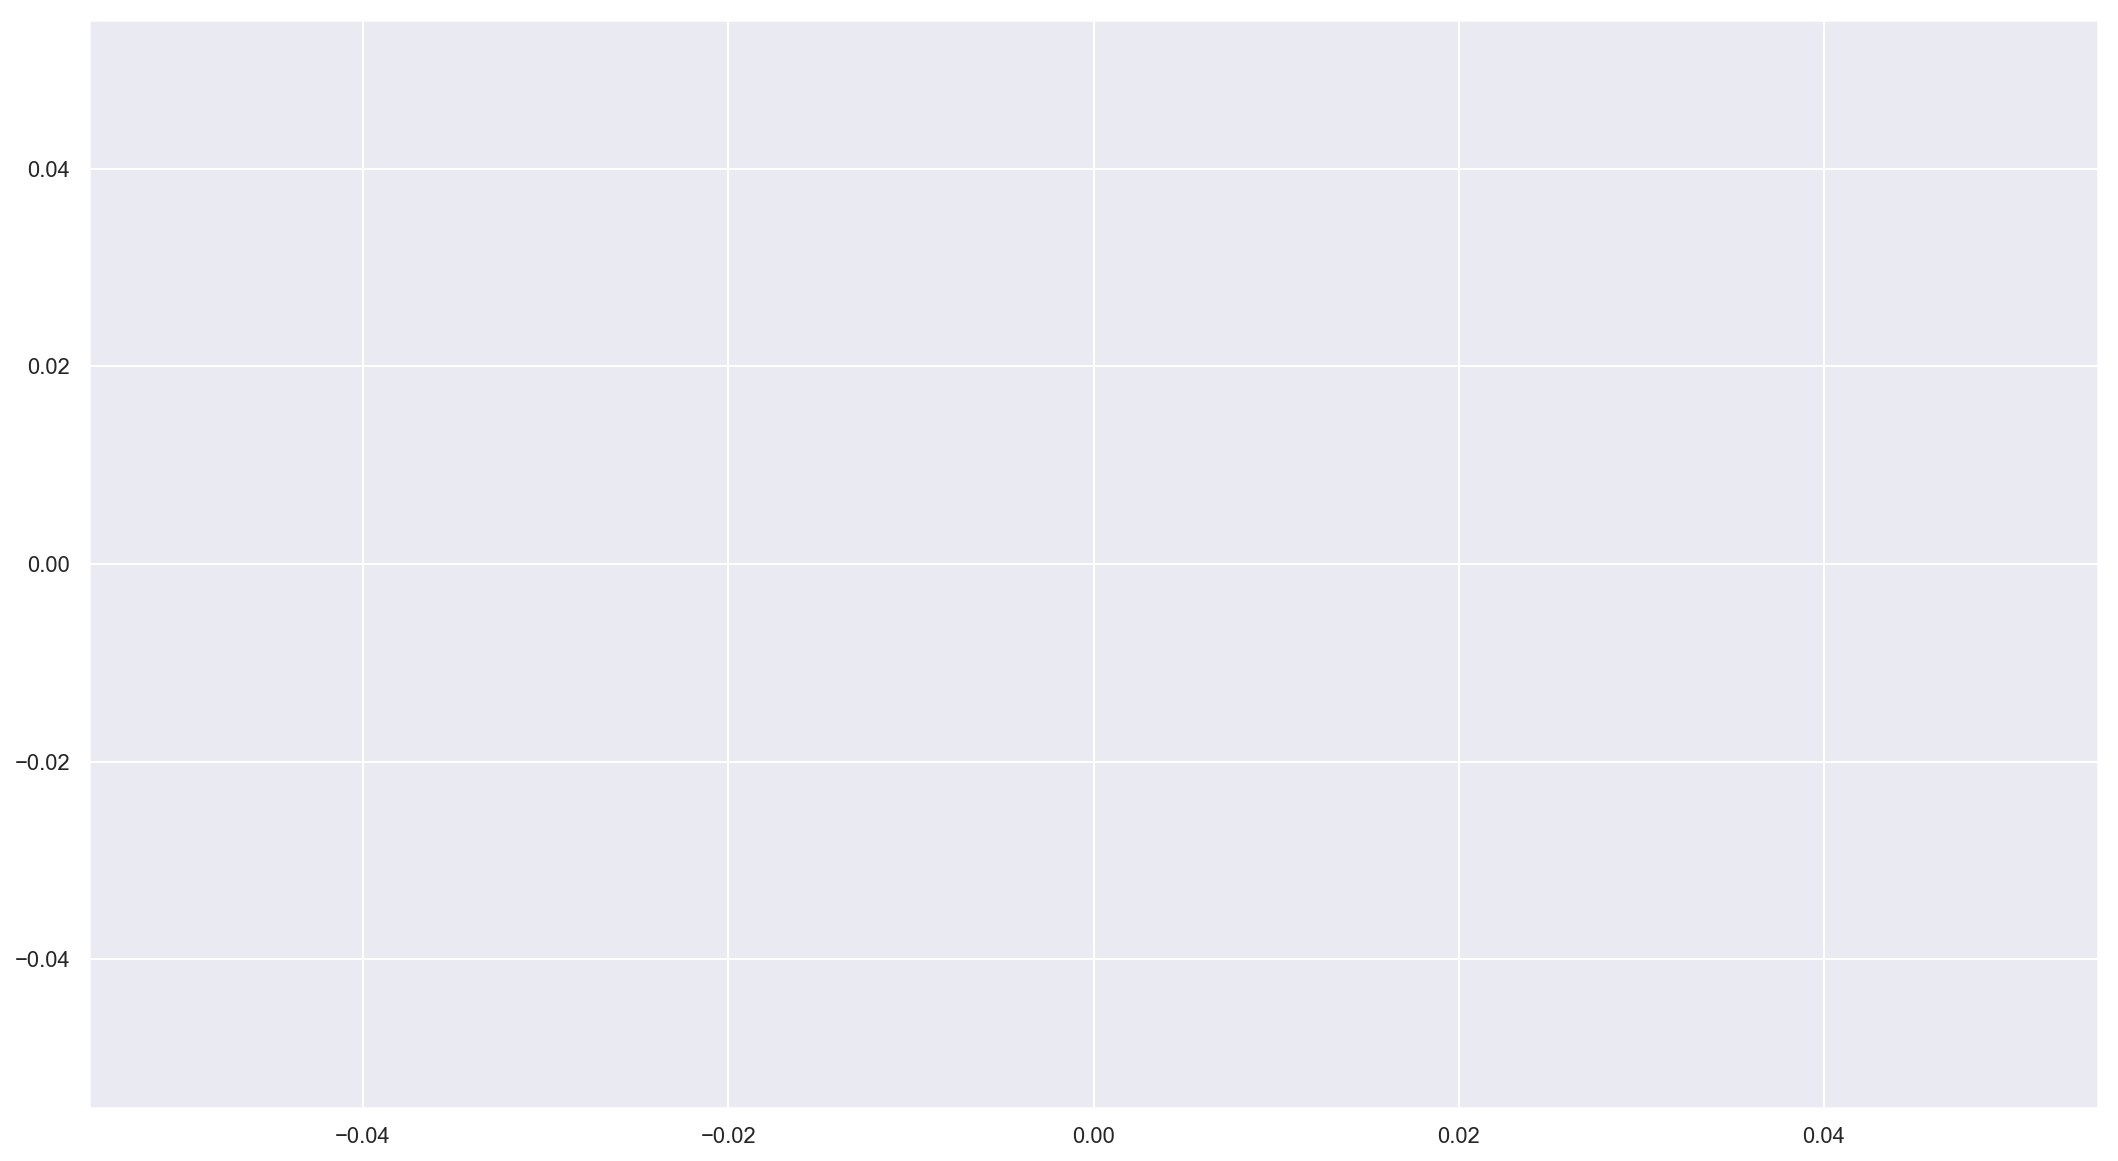

In [366]:
fig = plt.figure(figsize=(18,10))
for entry in range(100,1,-1):
    weeks = np.arange(rank_sorted.loc[rank_sorted['entry'] == entry, 'week'].max())
    line_df = pd.Series(np.full(len(weeks),np.nan),index=weeks)
    for week in weeks:
        try:
            line_df[week] = rank_sorted.loc[(rank_sorted['week'] == week) & (rank_sorted['entry'] == entry),'value'].first()
        except:
            line_df[week] = np.nan
    _ = plt.plot(line_df.index,line_df,label=entry)

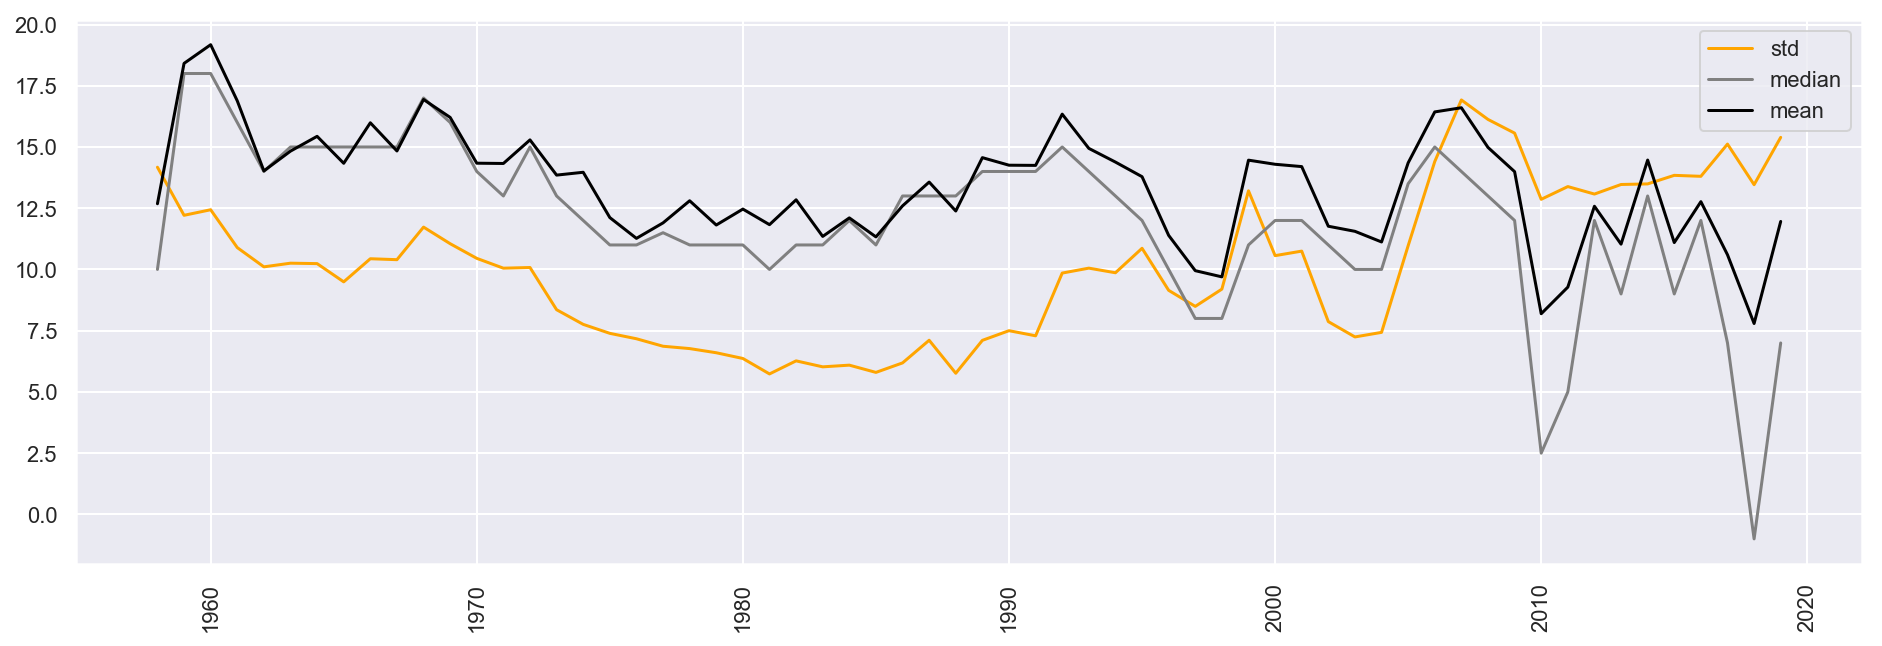

In [227]:
_ = plt.figure(figsize=(16,5))
hot100_year_std = hot100_uniq.groupby(by=['year'])['max_leap'].std()
_ = plt.plot(hot100_year_std.index,hot100_year_std, label='std')
hot100_year_median = hot100_uniq.groupby(by=['year'])['max_leap'].median()
_ = plt.plot(hot100_year_median.index,hot100_year_median,label='median')
hot100_year_mean = hot100_uniq.groupby(by=['year'])['max_leap'].mean()
_ = plt.plot(hot100_year_mean.index,hot100_year_mean,label='mean')
_ = plt.legend()
_ = plt.xticks(rotation=90)

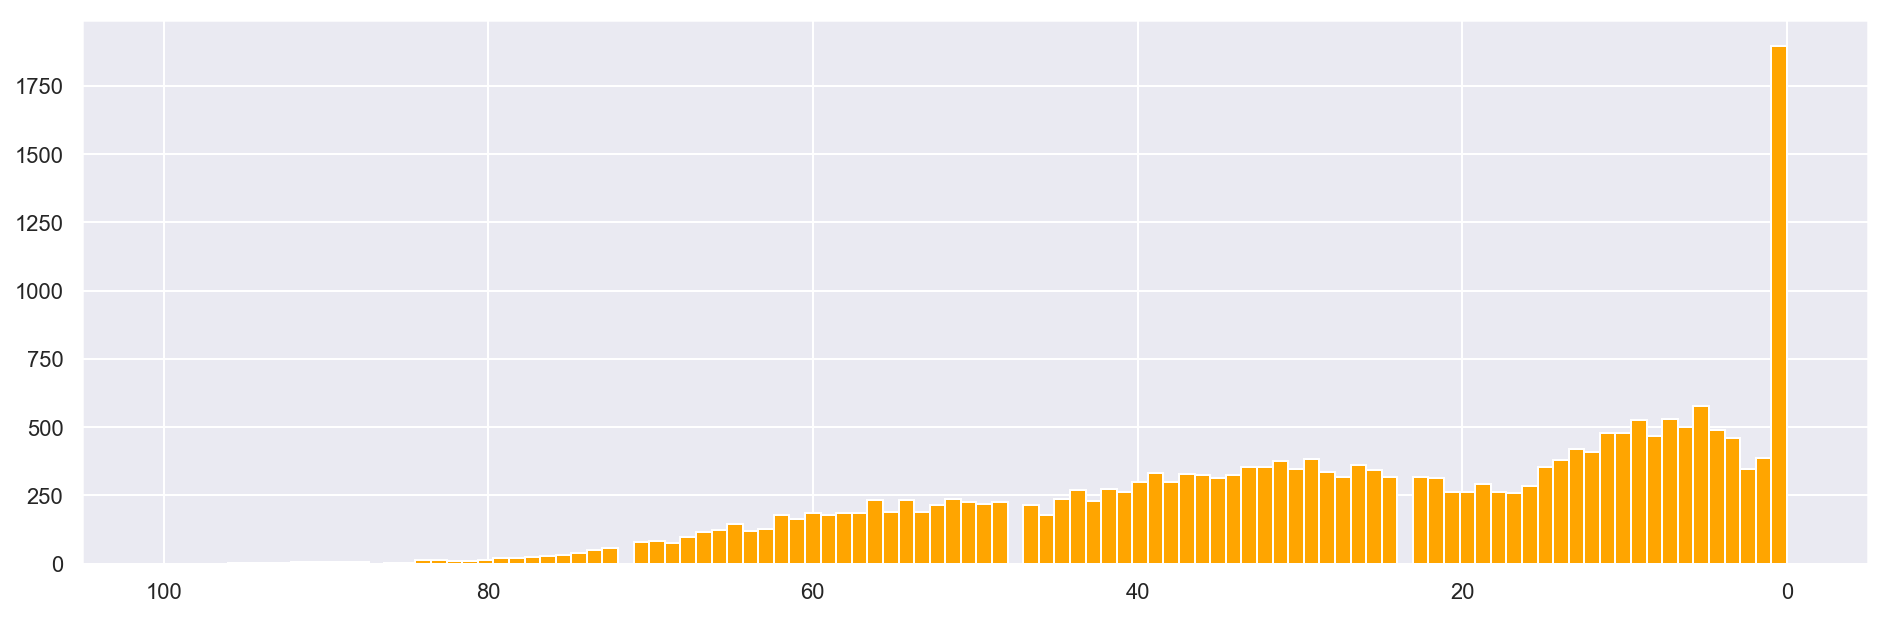

In [9]:
_ = plt.figure(figsize=(16,5))
_ = plt.hist(nhits['popularity'],bins=100)
_ = plt.xlim(105, -5)

In [66]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='e3cddf5da81f43c3a33814866a8de8ed', client_secret='f885f6255fb34c90b8679817d9c63c25')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username = '1162788143'
scope = 'user-library-read playlist-modify-public'
token = util.prompt_for_user_token(username,scope,client_id='e3cddf5da81f43c3a33814866a8de8ed',client_secret='f885f6255fb34c90b8679817d9c63c25',redirect_uri='http://localhost:3000/spotify')

print(token)
sp = spotipy.Spotify(auth=token)
playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    if playlist['owner']['id'] == username:
        print( playlist['name'],playlist['id'])
        
# add tracks
playlist = '0iP1Sz5qSCmVomZUNYbKPj'

tracks = over_30_bf_1990.merge(hits,on=['artist','title'],how='left')['id'].dropna()

count = 0
tracks_chunks = []
chunk_size = 50
for i in range(0, len(tracks), chunk_size):
    count += 1
    tracks_chunks.append(tracks[i:i + chunk_size].tolist())

for track_chunk in tracks_chunks:
    # results = sp.user_playlist_remove_all_occurrences_of_tracks(username, playlist, track_chunk)
    results = sp.user_playlist_add_tracks(username, playlist, track_chunk)
    pass

unidentified_tracks = over_30_bf_1990.merge(hits,on=['artist','title'],how='left')
unidentified_tracks = unidentified_tracks.loc[unidentified_tracks['id'].isnull(),:]
print('Unidentified Tracks: {}'.format(len(unidentified_tracks)))
unidentified_tracks.head()

BQC0SYnW6-KXCo4oJ5YEXrwez7c8C-xZ1NI4Q8r2ApKl55o2O-gSVXk7sHHSj32_Ms4Nii2xAQtwR8pE8BclPSpEWmYnghgpNs_FlxBW3WOZzE1gAwFLAdKuCTsn_2nL4qvz1lZYWv6llUysMA4VYs6lYfnw6Y9LZ_dRVBRztDCgpBURG1Dlqim162avTbfO7nZHN53u-bXjOwKyvUoBMscCiMTIY1shJvldnoSZiKboivNosPswO5vZ6W9FkyyNE6xD
Top Performers (over 30 weeks on Hot 100) after 1990 4hzjzSssha8VLHqwbyJiWA
Top Performers (over 30 weeks on Hot 100) before 1990 0iP1Sz5qSCmVomZUNYbKPj
One Last Time 3ZwAJ2qk43yd1koijPH7YT
Mama 2ePqWjZcg9KRfUnQDFhHbk
Sound|lak 6dyhSsiZpuMkewsyHVx6gm
r/electronicmusic 4JrcG01JVrPx5LwDZtCUmp
r/electronicmusic 07mrhm2rUzIIpxeHKBR7t6
r/electronicmusic 33TWFRDDJYZAXwOsOooGS1
r/listentothis 7cma3lRZ3lU5eib2XJOOfr
r/listentothis 26YyDqzb9tuexrTSdA7KBG
r/listentothis 48pm9w4KkgJpaEVXHuzN1I
r/listentothis 5j2H6xjeHPWl3iTOipTS46
r/listentothis 102IiL0kVjhztveDvy6v0T
r/listentothis 0u02nV7bU0Zj4HPpGoN6DG
r/electronicmusic 2V2fHJ88t33L68dnBW0TeQ
r/electronicmusic 6Cs8OjxrBDIu3pPdaw7Axm
r/listentothis 7H2sVYBbkyOlqDkrmdxUxh
r/listentothis 4o

,artist,title,streak,peak_x,entry,exit,index,date,year,peak_y,filename,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,type,uri,track_href,analysis_url,time_signature
2,Young M.C.,Bust A Move,38,7,81,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
target_path = '../data/iterators/spotify_ids_hot100.csv'
target_df = pd.read_csv(target_path,sep='\t').drop_duplicates(subset=['artist','title'])

found = target_df.loc[~target_df['iterator'].isnull(),:]
not_found = target_df.loc[target_df['iterator'].isnull(),:]
print("Total: {}\nFound: {}\nNot Found: {}\nRatio: {}".format(len(target_df),len(found),len(not_found),len(not_found)/len(target_df)))

Total: 28083
Found: 24414
Not Found: 3669
Ratio: 0.13064843499626108


In [24]:
nhits.columns

Index(['year', 'name', 'artist_name', 'popularity', 'id', 'album.id',
       'album.name', 'album.release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'type', 'uri',
       'track_href', 'analysis_url', 'time_signature'],
      dtype='object')

                   x          y          z  label
28998  -65995.373576  23.677986   2.318254    0.0
35524  -35982.373573  24.356540  -1.263599    0.0
8497   -61395.373664  14.651651   0.220010    1.0
19062   60644.625915 -30.216612  -2.250195    1.0
41712   51791.626347  15.962284  -3.883019    0.0
32166   64364.626493  31.293168  -4.868248    0.0
10991 -125381.373714   9.862049  -0.799724    1.0
26981  100311.626185  -1.591917  -4.043828    0.0
5887    15484.626296  11.054805  -6.382577    1.0
12541  -11248.373583  23.558621  -4.282061    1.0
23021  -39688.373558  26.633962  -4.855711    0.0
8029   -78381.373709   9.809522   1.658497    1.0
12460  -49488.373578  23.729238   1.512876    1.0
7761   -46319.373614  19.819610   0.442275    1.0
6809    68858.626228   2.574855  -0.027666    1.0
40033  -89035.374364 -59.785143   3.060405    0.0
6429   -65635.373999 -21.282734   3.360056    1.0
44598  131631.626604  41.707213   4.956927    0.0
4052    10098.626453  26.897829  -0.553161    1.0


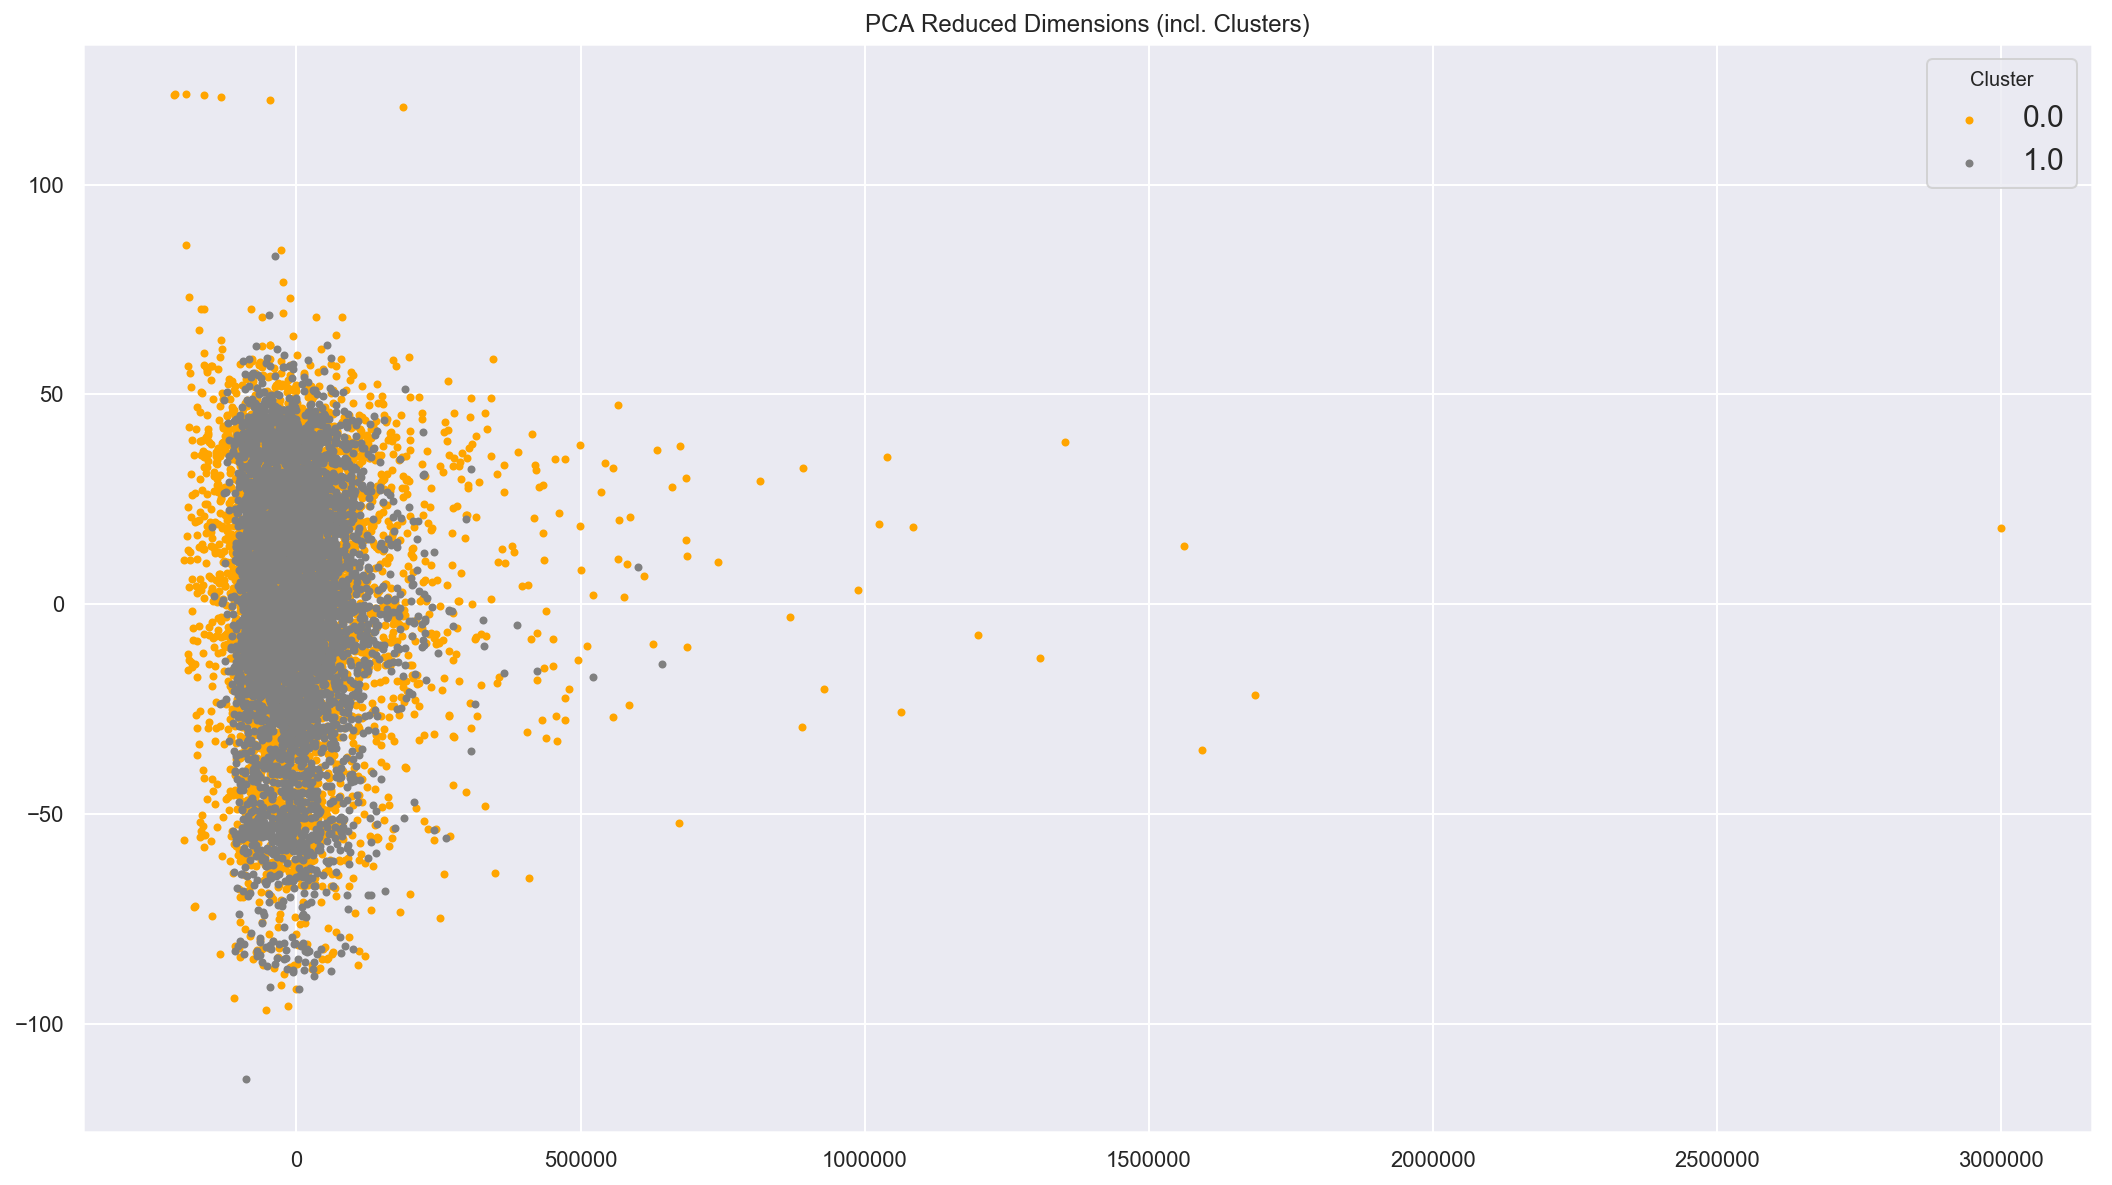

In [50]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','id']
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']
all_songs = pd.concat([hits.loc[:,columns], nhits.loc[:,columns]]).reset_index()
all_songs.loc[all_songs['id'].isin(hits['id']),'label'] = 1
all_songs.loc[all_songs['id'].isin(nhits['id']),'label'] = 0
x_cols = all_songs.loc[:,features].fillna(0)
indices = np.random.choice(all_songs.index,10000,replace=False)
x_cols = x_cols.loc[indices,:]
pca = PCA(n_components=12)

pca.fit(x_cols)
transformed = pca.transform(x_cols).T
try:
    transformed_clusters = pd.DataFrame({'x': transformed[0],'y': transformed[1],'z': transformed[2],'label':all_songs.loc[indices,'label']})
except:
    print('two-dimensional space')
    transformed_clusters = pd.DataFrame({'x': transformed[0],'y': transformed[1],'label':all_songs.loc[indices,'label']})    
    
fig = plt.figure(figsize=(18,10))

print(transformed_clusters)
def plot_pca(transformed_clusters,three_d=False):
    lgd_labels = sorted(transformed_clusters['label'].unique())
    
    if three_d:
        ax = fig.add_subplot(111, projection='3d')

        for label in lgd_labels:
            x = transformed_clusters.loc[transformed_clusters['label'] == label,'x']
            y = transformed_clusters.loc[transformed_clusters['label'] == label,'y']
            z = transformed_clusters.loc[transformed_clusters['label'] == label,'z']

            ax.scatter3D(x, y, z, label=label,alpha=0.3);
    else:
        for label in lgd_labels:
            x = transformed_clusters.loc[transformed_clusters['label'] == label,'x']
            y = transformed_clusters.loc[transformed_clusters['label'] == label,'y']

            _ = plt.scatter(x,y,label=label,marker='.')

    _ = plt.legend(loc="upper right", title="Cluster",fontsize=15)
    _ = plt.title('PCA Reduced Dimensions (incl. Clusters)')

plot_pca(transformed_clusters)